In [60]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [61]:
train_df = pd.read_csv("C:/Users/amank/OneDrive/Documents/Titanic Data/train.csv")

In [62]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
test_df = pd.read_csv("C:/Users/amank/OneDrive/Documents/Titanic Data/test.csv")

In [64]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
train_df.select_dtypes(exclude="O").head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [66]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [67]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [69]:
train_data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [70]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [71]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [72]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])

In [73]:
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)
final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [74]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [75]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna = True), inplace = True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna = True), inplace = True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)


final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


In [82]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


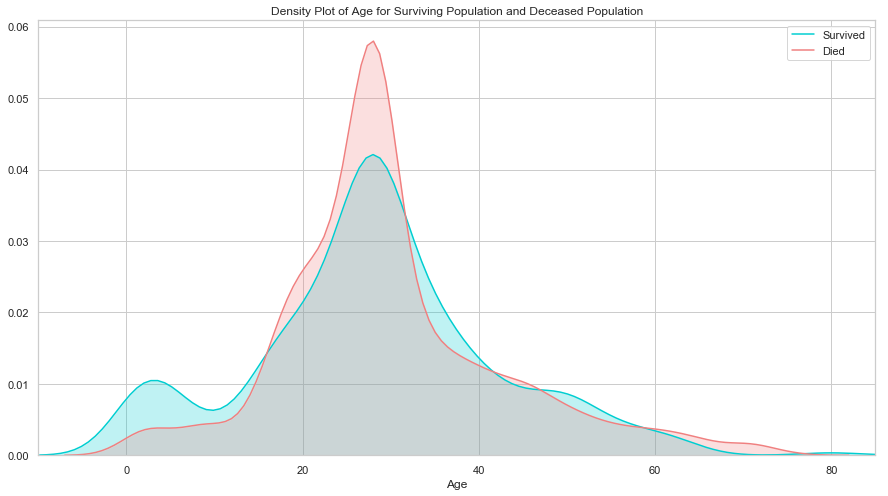

In [83]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
print(final_train.head())
print(final_test.head())
print(cols)
print(final_train[cols])
X = final_train[cols]
y = final_train['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

   Survived   Age     Fare  TravelAlone  Pclass_1  Pclass_2  Pclass_3  \
0         0  22.0   7.2500            0         0         0         1   
1         1  38.0  71.2833            0         1         0         0   
2         1  26.0   7.9250            1         0         0         1   
3         1  35.0  53.1000            0         1         0         0   
4         0  35.0   8.0500            1         0         0         1   

   Embarked_C  Embarked_Q  Embarked_S  Sex_male  IsMinor  
0           0           0           1         1        0  
1           1           0           0         0        0  
2           0           0           1         0        0  
3           0           0           1         0        0  
4           0           0           1         1        0  
    Age     Fare  TravelAlone  Pclass_1  Pclass_2  Pclass_3  Embarked_C  \
0  34.5   7.8292            1         0         0         1           0   
1  47.0   7.0000            0         0         0        

Optimal number of features: 8
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


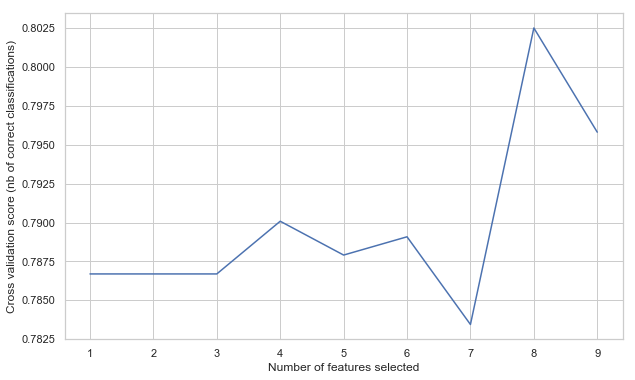

In [85]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [87]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [88]:
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [90]:
for key,value in data.items():
    print(key)

data
target
target_names
DESCR
feature_names


In [95]:
breast_data_frame = pd.DataFrame(data.data, columns = data.feature_names)
print(len(data.data))
breast_data_frame['target'] = data.target
breast_data_frame.shape

569


(569, 31)

In [96]:
breast_data_frame.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [97]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(data.data, data.target)
# display the relative importance of each attribute
print(model.feature_importances_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.03356908 0.02303696 0.05024387 0.0178349  0.0060684  0.03647498
 0.03488825 0.10555019 0.00801388 0.00612181 0.03145635 0.00530897
 0.0288061  0.08208057 0.00786242 0.00504127 0.01504934 0.02672112
 0.00544548 0.00371759 0.14381339 0.02627793 0.02604416 0.06841428
 0.01849509 0.04604355 0.04361396 0.05846515 0.02723999 0.00830097]


In [124]:
X_train = breast_data_frame.copy()

In [125]:
X_train.drop('target', inplace= True, axis = 1)
y = breast_data_frame.target
print(y)
#print(np.where(y == 0, "benign","malign"))

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     1
20     1
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
539    1
540    1
541    1
542    1
543    1
544    1
545    1
546    1
547    1
548    1
549    1
550    1
551    1
552    1
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    0
563    0
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32


In [102]:
print(breast_data_frame.columns, X_train.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object') Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness err

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
        breast_data_frame,y,test_size=0.25, random_state=0)

In [108]:
print(X_train.head(),X_test.head(),y_train,y_test)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
293        11.85         17.46           75.54      432.7          0.08372   
332        11.22         19.86           71.94      387.3          0.10540   
565        20.13         28.25          131.20     1261.0          0.09780   
278        13.59         17.84           86.24      572.3          0.07948   
489        16.69         20.20          107.10      857.6          0.07497   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
293           0.05642        0.026880             0.022800         0.1875   
332           0.06779        0.005006             0.007583         0.1940   
565           0.10340        0.144000             0.097910         0.1752   
278           0.04052        0.019970             0.012380         0.1573   
489           0.07112        0.036490             0.023070         0.1846   

     mean fractal dimension   ...    worst texture  worst perimeter 

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Initialise a new scaling object for normalising input data
sc=StandardScaler() 

# Set up the scaler just on the training set
sc.fit(X_train)

# Apply the scaler to the training and test sets
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [111]:
print(X_train_std)

[[-0.65079907 -0.43057322 -0.68024847 ...  0.32349851 -0.7578486
   0.7716901 ]
 [-0.82835341  0.15226547 -0.82773762 ...  0.62563098 -1.03071387
   0.7716901 ]
 [ 1.68277234  2.18977235  1.60009756 ... -0.51329768 -0.96601386
  -1.29585697]
 ...
 [-1.33114223 -0.22172269 -1.3242844  ... -0.69995543 -0.12266325
   0.7716901 ]
 [-1.25110186 -0.24600763 -1.28700242 ... -1.56206114 -1.00989735
   0.7716901 ]
 [-0.74662205  1.14066273 -0.72203706 ... -1.24094654  0.2126516
   0.7716901 ]]


In [114]:
from sklearn.linear_model import LinearRegression
lr = LogisticRegression(C = 100 , random_state= 0)
lr.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [115]:
y_pred = lr.predict(X_test_std)

In [116]:
correct = (y_test == y_pred).sum()
incorrect = (y_test != y_pred).sum()
accuracy = correct / (correct + incorrect) * 100

print('\nPercent Accuracy: %0.1f' %accuracy)


Percent Accuracy: 100.0


In [119]:
prediction = pd.DataFrame()
prediction['actual'] = data.target_names[y_test]
prediction['predicted'] = data.target_names[y_pred]
prediction['correct'] = prediction['actual'] == prediction['predicted']

print ('\nDetailed results for first 20 tests:')
print (prediction)


Detailed results for first 20 tests:
        actual  predicted  correct
0    malignant  malignant     True
1       benign     benign     True
2       benign     benign     True
3       benign     benign     True
4       benign     benign     True
5       benign     benign     True
6       benign     benign     True
7       benign     benign     True
8       benign     benign     True
9       benign     benign     True
10      benign     benign     True
11      benign     benign     True
12      benign     benign     True
13      benign     benign     True
14      benign     benign     True
15   malignant  malignant     True
16      benign     benign     True
17   malignant  malignant     True
18   malignant  malignant     True
19   malignant  malignant     True
20   malignant  malignant     True
21   malignant  malignant     True
22      benign     benign     True
23      benign     benign     True
24   malignant  malignant     True
25      benign     benign     True
26      benign   